In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS
%matplotlib inline

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## EDA

In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

In [7]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

In [8]:
# Check nulls
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [9]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Break into Numerical and Categorical

In [10]:
categorical=customer_df.select_dtypes(include=object)
numerical=customer_df.select_dtypes(include=np.number)

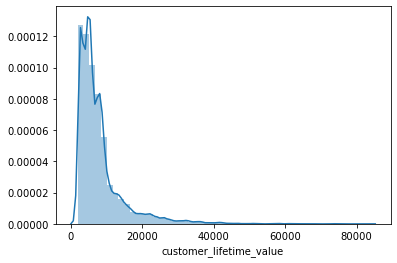

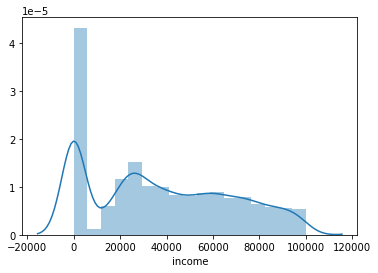

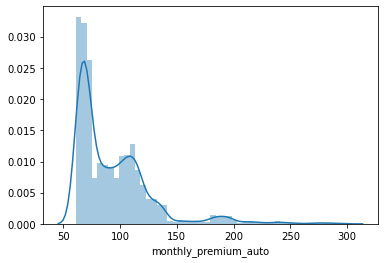

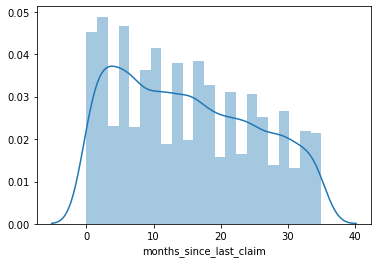

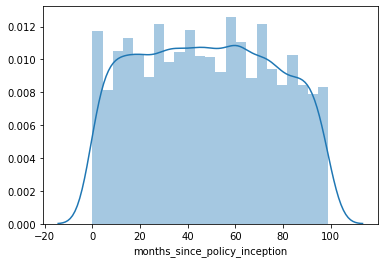

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


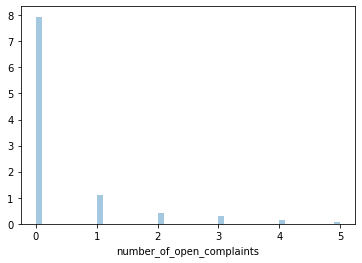

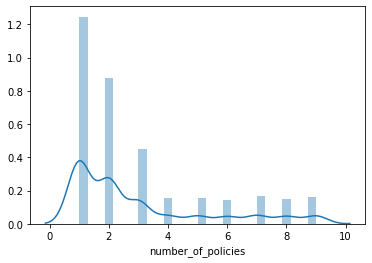

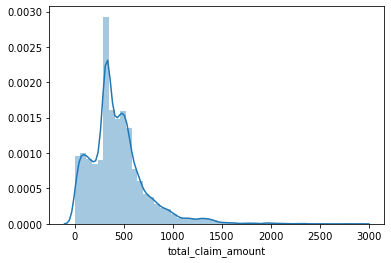

In [11]:
def plot_num(Dataframe):
    for column in Dataframe.columns:
        sns.distplot(a=Dataframe[column])
        plt.show()
    return None
   

plot_num(numerical)

## Checking for outliers

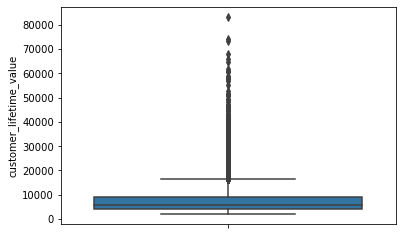

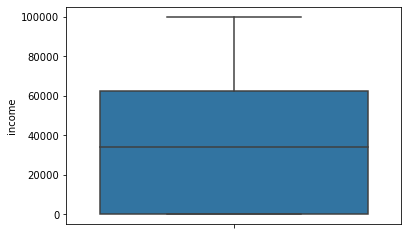

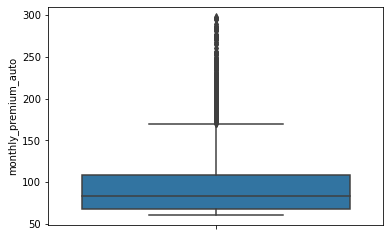

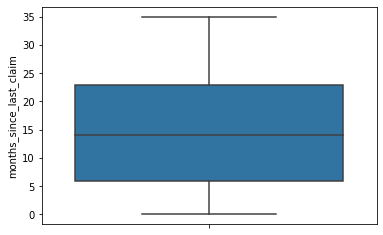

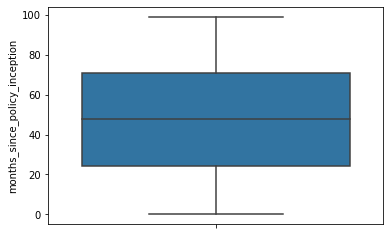

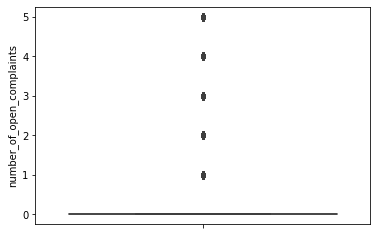

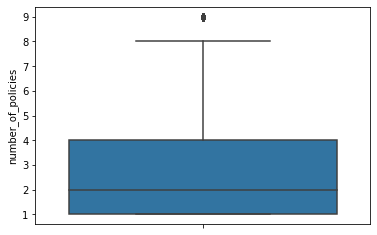

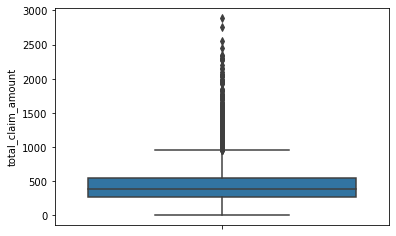

In [12]:
def outlier(Dataframe):
    for column in Dataframe.columns:
        sns.boxplot(y=Dataframe[column])
        plt.show()
    return None
   

outlier(numerical)

### Columns with outliers

* customer_lifetime_value 
* monthly_premium_auto 
* total_claim_amount

In [13]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [34]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [47]:
def value_count(df):
    for columns in df:
            print (columns,':     ',len(numerical[columns].value_counts()))
    return

value_count(numerical)
        
#print(len(numerical.customer_lifetime_value.value_counts()))        

customer_lifetime_value :      8041
income :      5694
monthly_premium_auto :      202
months_since_last_claim :      36
months_since_policy_inception :      100
number_of_open_complaints :      6
number_of_policies :      9
total_claim_amount :      5106


In [39]:
print(len(numerical.customer_lifetime_value.value_counts()))
print(len(numerical.income.value_counts()))
print(len(numerical.monthly_premium_auto.value_counts()))
print(len(numerical.months_since_last_claim.value_counts()))
print(len(numerical.months_since_policy_inception.value_counts()))
print(len(numerical.number_of_open_complaints.value_counts()))
print(len(numerical.number_of_policies.value_counts()))
print(len(numerical.total_claim_amount.value_counts()))

8041
5694
202
36
100
6
9
5106


In [14]:
print('Old Shape', numerical.shape)

Old Shape (9134, 8)


In [15]:
def outliers(column, threshold = 3):
    """
    docs
    """
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [16]:
CLV_outliers = outliers(numerical["customer_lifetime_value"])
MPA_outliers = outliers(numerical["monthly_premium_auto"])
TCA_outliers = outliers(numerical["total_claim_amount"])

In [17]:
to_drop = CLV_outliers.index | MPA_outliers.index | TCA_outliers.index  # Union

In [18]:
clean_numerical = numerical.drop(to_drop).reset_index(drop = True)
clean_numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [19]:
categorical = categorical.drop(to_drop).reset_index(drop = True)

In [20]:
 print("New Shape: ", clean_numerical.shape)

New Shape:  (8670, 8)


## Looking at Categorical features

In [21]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
# customer has all unique values, dropping before I plot
categorical= categorical.drop(['customer'], axis = 1)

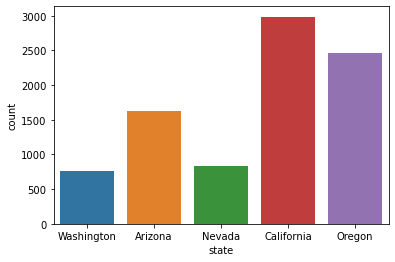

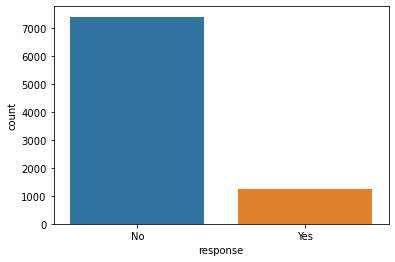

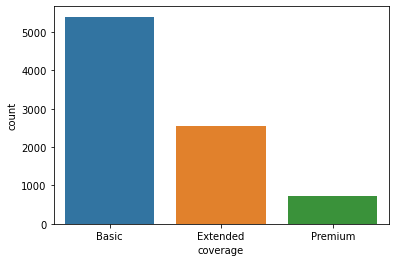

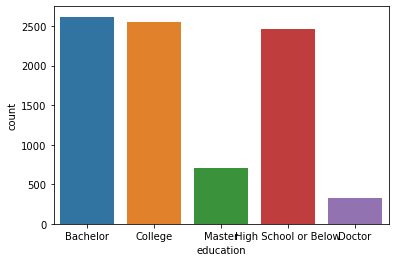

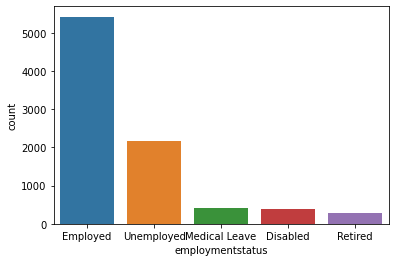

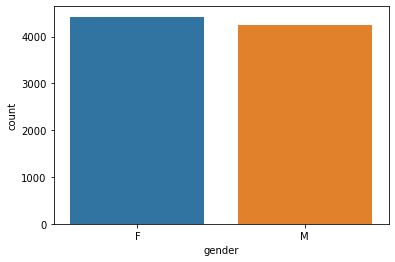

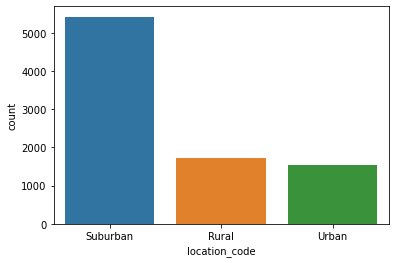

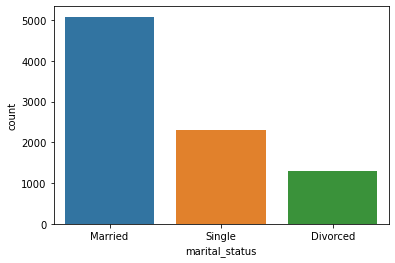

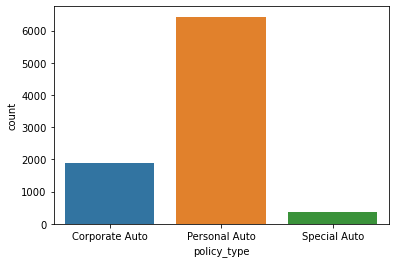

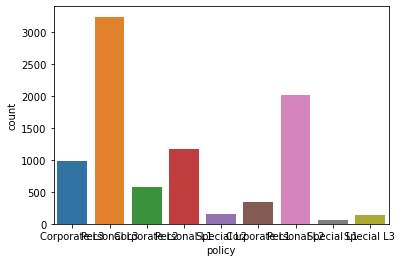

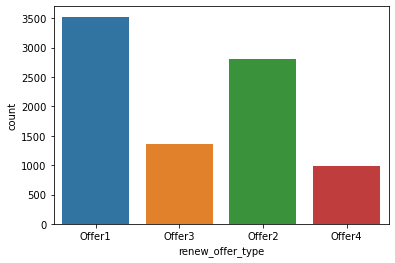

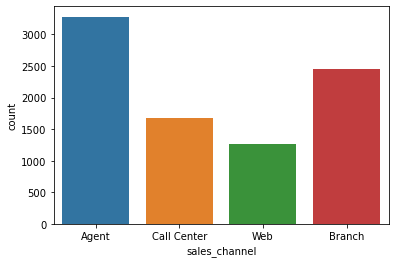

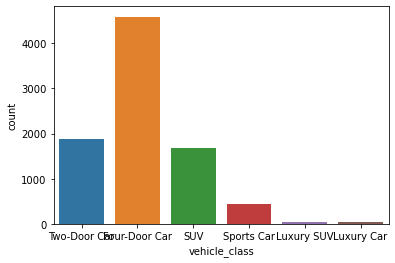

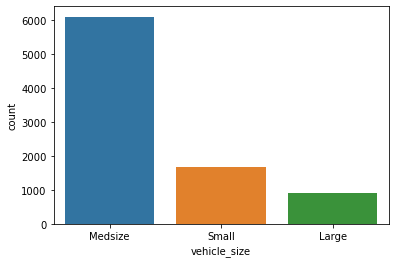

In [23]:
def plot_cat(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None
   

plot_cat(categorical)


## Insights into categorical data
column | decision
-------|---------
state | only 5 - leave as is
response | imbalanced make 1,0
coverage| ordinal encode
education | combine master & dr.
employment status | smallest 3 into other
gender | 1hot encode
location | ordinal encode as is
marital | 1hot encode as is
policy type | combine corporate/special
policy | drop column
renew offer | encode as is
sales channel | 1hot encode as is
vehicle class | 1hot combine luxury/sports
vehicle size | ordinal encode

## Finding discrete and continuous columns

In [24]:
#discrete = [i for i in numerical if (numerical[i].all() == numerical[i].apply(int).all()) \
                 #& (len(numerical[i].unique()) < (numerical.shape[0] * 0.01))]

# continuous = list(numerical.drop(columns = discrete).columns)

In [25]:
#numerical['Total Claim Amount'].apply(lambda x: x.is_integer()).sum()
#len(numerical['Total Claim Amount'])

In [26]:
# def dis_cont(df):
#     discrete = []
#     continuous = []
#     for col in df:
#         if (df[col].all() == df[col].apply(int).all()) & (len(df[col].unique()) < (df.shape[0] * 0.01)):
#             discrete.append(col)
#         else:
#             continuous.append(col)
#     return discrete, continuous
            

In [27]:
# len(numerical['Total Claim Amount'].unique())
# numerical.shape[0]*.01

In [28]:
def distinct_continuous(df):
    discrete_lst = []
    continuous_lst = []
    for col in df.columns:
        if len(df[col].unique()) < (df.shape[0] * 0.01):
            discrete_lst.append(col)
        else:
            continuous_lst.append(col)
    return (discrete_lst, continuous_lst)
   
        

In [29]:
discrete_lst, continuous_lst = distinct_continuous(clean_numerical)

In [30]:
print('Discrete List:  ',discrete_lst)
print('Cotinuous List:   ',continuous_lst)

Discrete List:   ['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']
Cotinuous List:    ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']


In [31]:
num_discrete_df = numerical[['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']]
num_continuous_df = numerical[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_policy_inception', 'total_claim_amount']]

# Checking if the discrete list can all be integers

In [32]:
# def is_integer_num(df):
#     for col in df:
#         for i in col:
#             if isinstance(i, int):
#                 print('int')
#             if isinstance(i, float):
#                 print('float')
#     return   


# is_integer_num(num_discrete_df)

# Checking Correlations

In [33]:
correlations = clean_numerical.corr()
correlations

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.030194,0.300980,0.003133,-0.017842,-0.041322,0.075395,0.115665
income,0.030194,1.000000,0.003071,-0.027863,0.001944,0.002430,-0.006333,-0.387077
monthly_premium_auto,0.300980,0.003071,1.000000,-0.004724,0.003429,-0.018716,-0.010235,0.492506
months_since_last_claim,0.003133,-0.027863,-0.004724,1.000000,-0.050337,0.010318,0.006492,-0.004850
months_since_policy_inception,-0.017842,0.001944,0.003429,-0.050337,1.000000,-0.001028,-0.012252,-0.019157
number_of_open_complaints,-0.041322,0.002430,-0.018716,0.010318,-0.001028,1.000000,0.002139,-0.018672
number_of_policies,0.075395,-0.006333,-0.010235,0.006492,-0.012252,0.002139,1.000000,-0.000110
total_claim_amount,0.115665,-0.387077,0.492506,-0.004850,-0.019157,-0.018672,-0.000110,1.000000


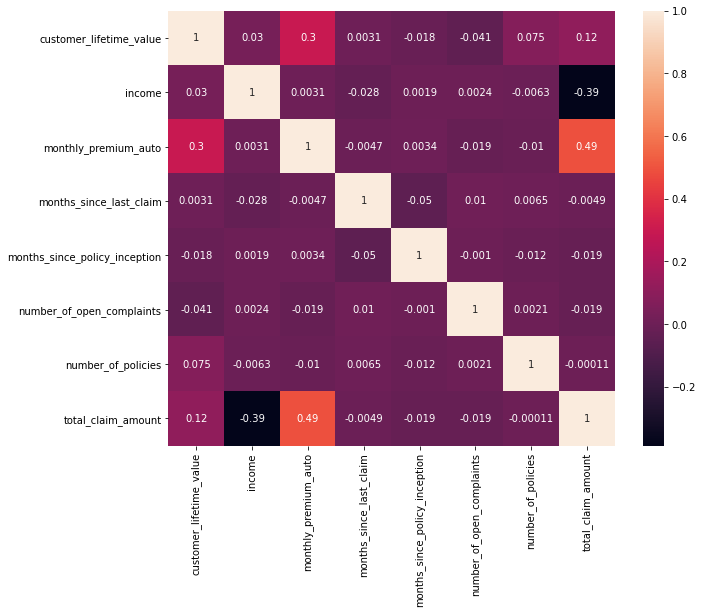

In [34]:
fig, ax=plt.subplots(figsize=(10, 8))
ax=sns.heatmap(clean_numerical.corr(), annot=True)
plt.show()

## Working with categoricals

In [35]:
categorical_columns = [col for col in categorical if (len(categorical[col].unique()) < (numerical.shape[0] * 0.01))]

In [36]:
print(categorical_columns)

['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


### Check if any columns are different

In [37]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## Dummy code for ordinal encoding
#### data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [38]:
categorical["coverage"] = categorical["coverage"].map({"Basic" : 0, "Extended" :.5, "Premium" : 1})

In [39]:
categorical['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [40]:
categorical["education"] =categorical["education"].map({"High School or Below" : 0, "Bachelor" : .5, "College":.5, "Master" : 1, "Doctor":1})

In [41]:
categorical["employmentstatus"] = categorical["employmentstatus"].map({"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : .5, "Employed":2})


In [42]:
categorical["location_code"] =categorical["location_code"].map({"Rural" : 0, "Suburban" :.5, "Urban" : 1,})

In [43]:
categorical["vehicle_size"] =categorical["vehicle_size"].map({"Small" : 0, "Medsize" :.5, "Large" : 1,})

In [44]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0.5


In [68]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,0.5
1,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,0.5
2,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,0.5
3,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,0.5
4,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,0.5


In [69]:
categorical = categorical.drop(['policy'], axis=1)

In [70]:
X_all=pd.concat([clean_numerical, categorical], axis=1)
X_all.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,0.0,0.5,2.0,F,0.5,Married,Corporate Auto,Offer1,Agent,Two-Door Car,0.5
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,0.5,0.5,0.0,F,0.5,Single,Personal Auto,Offer3,Agent,Four-Door Car,0.5
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,1.0,0.5,2.0,F,0.5,Married,Personal Auto,Offer1,Agent,Two-Door Car,0.5
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,0.0,0.5,0.0,M,0.5,Married,Corporate Auto,Offer1,Call Center,SUV,0.5
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,0.0,0.5,2.0,M,0.0,Single,Personal Auto,Offer1,Agent,Four-Door Car,0.5


### Processing for the X y split
### X=features  y=target

In [71]:
X=X_all.drop('total_claim_amount', axis=1)
y=X_all['total_claim_amount']

In [72]:
X.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
state                            0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
dtype: int64

## Train/test/split data
### Splitting / Scaling / 1Hot encoding X_train and X_test

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (6936, 20)
y_train shape is: (6936,)
X_test shape is: (1734, 20)
y_train shape is: (1734,)


## Break into numerical and categorical

In [74]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat =X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

In [75]:
X_train_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
6415,4927.707574,0,67,29,40,0,9,0.0,0.5,0.0,0.0,0.5
5006,4025.095533,0,119,29,54,2,1,0.0,0.5,0.0,0.5,0.0
5286,5120.615661,0,76,11,14,4,3,0.5,0.0,0.0,1.0,0.5
3013,7599.895827,52113,97,14,85,0,6,0.5,0.5,2.0,0.5,0.5
2086,14727.505260,97785,73,35,36,0,2,0.0,1.0,2.0,1.0,0.5


### Initialize and fit the scaler

In [76]:
transformer = MinMaxScaler().fit(X_train_num)

In [107]:
X_norm1 = transformer.transform(X_train_num)
X_train_scale = pd.DataFrame(X_norm1, columns=X_train_num.columns)
X_train_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.113843,0.000000,0.044444,0.828571,0.404040,0.0,1.000,0.0,0.5,0.0,0.0,0.5
1,0.079927,0.000000,0.429630,0.828571,0.545455,0.4,0.000,0.0,0.5,0.0,0.5,0.0
2,0.121091,0.000000,0.111111,0.314286,0.141414,0.8,0.250,0.5,0.0,0.0,1.0,0.5
3,0.214252,0.521229,0.266667,0.400000,0.858586,0.0,0.625,0.5,0.5,1.0,0.5,0.5
4,0.482076,0.978036,0.088889,1.000000,0.363636,0.0,0.125,0.0,1.0,1.0,1.0,0.5


In [78]:
X_norm2 = transformer.transform(X_test_num)
X_test_scale = pd.DataFrame(X_norm2, columns=X_test_num.columns)
X_test_scale.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,education,employmentstatus,location_code,vehicle_size
0,0.164575,0.210280,0.155556,0.914286,0.080808,0.2,1.00,0.5,0.5,1.0,0.5,1.0
1,0.009475,0.000000,0.000000,0.800000,0.313131,0.0,0.00,0.0,0.0,0.0,0.5,0.5
2,0.023018,0.000000,0.066667,0.714286,0.303030,0.0,0.00,0.0,0.5,0.0,0.5,0.0
3,0.040773,0.000000,0.222222,0.085714,0.575758,0.0,0.00,0.5,0.5,0.0,0.5,0.0
4,0.282803,0.469059,0.422222,0.371429,0.111111,0.0,0.25,0.0,1.0,1.0,1.0,0.5


In [79]:
X_train_cat.head(1)

,state,response,gender,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class
6415,Washington,No,F,Married,Personal Auto,Offer1,Branch,Two-Door Car


## 1-hot encoding the train and test

In [80]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.head()


<IPython.core.display.Javascript object>

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.head()


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Concatinating the scaled numericals and the encoded categories

In [82]:
X_train = pd.concat([X_train_cat_encode, X_train_scale], axis = 1)
X_test = pd.concat([X_test_cat_encode, X_test_scale], axis = 1)

In [83]:
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_test.shape)

X_train shape is: (6936, 33)
y_train shape is: (6936,)
X_test shape is: (1734, 33)
y_train shape is: (1734,)


##  Models

In [86]:
# Define function to run all models
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")


In [87]:
model_list = [LinearRegression(),SGDRegressor(),KNeighborsRegressor(), MLPRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
models_automation(model_list, X_train, y_train)



LinearRegression: Train -> 0.5468870789889452, Test -> 0.5569859700434842
SGDRegressor: Train -> 0.5444355833428887, Test -> 0.5526337784417099
KNeighborsRegressor: Train -> 0.6390770730533424, Test -> 0.46886174911802214


/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor: Train -> 0.6581764629553146, Test -> 0.6625462203614547
DecisionTreeRegressor: Train -> 1.0, Test -> 0.6725199851484966
RandomForestRegressor: Train -> 0.9764443900429829, Test -> 0.8291098438408859


### It looks like the Random Forest Regressor had the best results

In [89]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [97]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('FOREST',RandomForestRegressor))
seed = 7
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



LR: nan (nan)
KNN: nan (nan)
CART: nan (nan)


/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/sklearn/mo

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [ ]:
#https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/Users/erinberardi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


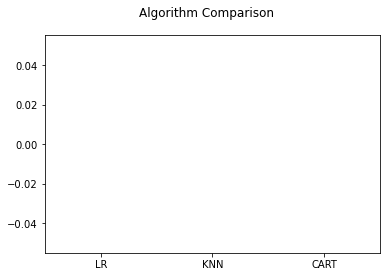

In [98]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [101]:
LR = LinearRegression()
LR.fit(X_train, y_train)
print('training set score:{:3f}'.format(LR.score(X_train,y_train)))
print('test set score:{:3f}'.format(LR.score(X_test,y_test)))

training set score:0.546887
test set score:0.556986


In [102]:
from sklearn.metrics import confusion_matrix

In [105]:
prediction = LinearRegression.predict(X_test)

TypeError: predict() missing 1 required positional argument: 'self'

In [104]:
confusion_matrix(y_test, prediction)

NameError: name 'prediction' is not defined